In [2]:
import requests
import requests as req
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import praw
from bs4 import BeautifulSoup
import time
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from nltk import word_tokenize
nltk.download('stopwords')
nltk.download('wordnet')
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag




[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
# Reddit
reddit = praw.Reddit(client_id ='XTt2t1E8bPGRk4pmxGqkeA',
                     client_secret ='A_b8L11XmCOJJzCg51WXoh7mw_6ZTw',
                     username = 'Vagarbond',
                     password = 'London55',
                     user_agent ='Summative')

# Reddit Politics Subreddit NEW TOPICS US

subreddit_us = reddit.subreddit('politics')
# Hot posts 

uspol_posts = subreddit_us.new(limit = 2000)


for post in uspol_posts:
    print(post.title)

Texas Republicans to censure Gonzales over support for gay marriage, gun control legislation
‘Cocaine Bear’ and ‘The Courage to Be Free’ by Ron DeSantis: A review
Future Democratic Hopeful Ro Khanna Takes On the Heartland From Silicon Valley
A Texas Republican Wants to Ban People From Reading About How to Get an Abortion Online
Warren Report Exposes Insurance Industry Ploy to 'Scam Millions of Seniors'
Supreme Court signals it could sidestep ruling in major elections case
What are the chances Fox News loses the lawsuit filed by Dominion Voting Systems?
AOC initially failed to pay for Met Gala dress, may have broken law: House report
Rebecca Kiessling sons’ deaths to fentanyl were dragged into DC’s partisan politics. Now she wants Biden to apologise
Scoop: Trump's 5-part plan to attack DeSantis
She secretly traveled 2,000 miles for her WA abortion. Why patients from the South are coming here
Rupert Murdoch could face FEC fines if he tipped off Jared Kushner about Biden's presidential ad

In [4]:
# Post Data for US Politics
subreddit_us = reddit.subreddit('politics')
uspol_posts = subreddit_us.new(limit = 5)

post_data = []
for post in uspol_posts:
    post_data.append([post.title, post.author.name, post.score, post.num_comments, post.created_utc])

# DataFrame

uspol_df = pd.DataFrame(post_data, columns = ['Title', 'Author', 'Score', 'Num Comments', 'Created UTC'])

# Top Posts

uspol_df = uspol_df.sort_values(by ='Score', ascending = False).head(5)
uspol_df

,Title,Author,Score,Num Comments,Created UTC
3,A Texas Republican Wants to Ban People From Re...,_Ginesthoi_,44,12,1.677853e+09
4,Warren Report Exposes Insurance Industry Ploy ...,nacorom,43,4,1.677853e+09
0,Texas Republicans to censure Gonzales over sup...,CordAlex1996,10,3,1.677855e+09
2,Future Democratic Hopeful Ro Khanna Takes On t...,ege3,6,1,1.677854e+09
1,‘Cocaine Bear’ and ‘The Courage to Be Free’ by...,Claeyt,3,2,1.677855e+09


In [5]:
subreddit_us = reddit.subreddit('politics')
us_posts = subreddit_us.new(limit = 2000)

# Titles and Source Only
us_data = []
for post in us_posts:
    us_data.append({'Title': post.title, 'Source': 'Reddit US Politics'})
uspol_Reddit = pd.DataFrame(us_data)
uspol_Reddit

,Title,Source
0,Texas Republicans to censure Gonzales over sup...,Reddit US Politics
1,‘Cocaine Bear’ and ‘The Courage to Be Free’ by...,Reddit US Politics
2,Future Democratic Hopeful Ro Khanna Takes On t...,Reddit US Politics
3,A Texas Republican Wants to Ban People From Re...,Reddit US Politics
4,Warren Report Exposes Insurance Industry Ploy ...,Reddit US Politics
...,...,...
985,"Instead of paying adults more, some states mig...",Reddit US Politics
986,"Flight Delays, Passenger Hassles Top Agenda fo...",Reddit US Politics
987,Can We Stop Being Cynical and Give Biden the H...,Reddit US Politics
988,Idaho bill would criminalize giving mRNA vacci...,Reddit US Politics


In [6]:
# Reddit UK Politics Subreddit NEW TOPICS 
subreddit_uk = reddit.subreddit('ukpolitics')

# New posts 
ukpol_posts = subreddit_uk.new(limit = 2000)

for post in ukpol_posts:
    print(post.title)

King Charles to travel to France and Germany in first state visits
Labour MP Rupa Huq regains whip after Kwasi Kwarteng racism row
Sue Gray: Tory MPs angry over Labour job for Partygate probe chief
James Cleverly says Falklands are British as Argentina ends deal
Energy Price Guarantee expected to continue at same level in April
[Nigel Farage]: I broke the lockdown rules – and pipsqueak Matt Hancock couldn’t stop me
Johnson may have misled Parliament over parties, say MPs - BBC News
Neil Coyle: MP who harassed assistant and racially abused journalist should be suspended - expert panel
COVID rule breaches at Downing St parties should have been 'obvious' to Johnson - MP committee | Politics News
Fears renewed as UK Horizon Europe association thrown into doubt
Hasidic boys’ schools leave Jewish pupils barely able to read or write English
Privileges Committee publish in advance of evidence session summary of issues to be raised with Boris Johnson MP || Mr Johnson has accepted the Committee’

In [7]:
# Data for UK Politics
subreddit_uk = reddit.subreddit('ukpolitics')
ukpol_posts = subreddit_uk.hot(limit = 5)

post_data = []
for post in ukpol_posts:
    post_data.append([post.title, post.author.name, post.score, post.num_comments, post.created_utc])

# DataFrame
ukpol_df = pd.DataFrame(post_data, columns = ['Title', 'Author', 'Score', 'Num Comments', 'Created UTC'])

# Top Posts
ukpol_df = ukpol_df.sort_values(by ='Score', ascending = False).head(5)
ukpol_df


,Title,Author,Score,Num Comments,Created UTC
3,Matt Hancock: More leaked texts put spotlight ...,meltedbrain123,352,133,1.677827e+09
4,NEW: Understand the privileges committee *COUL...,Rimalda,211,43,1.677836e+09
2,Johnson may have misled Parliament over partie...,meltedbrain123,127,25,1.677848e+09
1,"I'm Fraser Nelson, editor of The Spectator. AM...",Fraser_Nelson,40,68,1.677842e+09
0,Daily Megathread - 03/03/2023,ukpolbot,19,1197,1.677823e+09


In [8]:
# DataFrames for only Titles and Source: UK subreddit
subreddit_uk = reddit.subreddit('ukpolitics')
uk_posts = subreddit_uk.hot(limit = 2000)

uk_data = []
for post in uk_posts:
    uk_data.append({'Title': post.title, 'Source': 'Reddit UK Politics'})
ukpol_Reddit = pd.DataFrame(uk_data)
ukpol_Reddit

,Title,Source
0,Daily Megathread - 03/03/2023,Reddit UK Politics
1,"I'm Fraser Nelson, editor of The Spectator. AM...",Reddit UK Politics
2,Johnson may have misled Parliament over partie...,Reddit UK Politics
3,Matt Hancock: More leaked texts put spotlight ...,Reddit UK Politics
4,NEW: Understand the privileges committee *COUL...,Reddit UK Politics
...,...,...
917,Labour ‘within striking distance of leapfroggi...,Reddit UK Politics
918,Are you an unsettled withstander or a hopeful ...,Reddit UK Politics
919,UK's 'golden era' with China 'sent wrong messa...,Reddit UK Politics
920,No protocol deal yet but things could move qui...,Reddit UK Politics


In [12]:
# All Reddit Politics Title Data in Dataframe
combined_df = pd.concat([ukpol_Reddit, uspol_Reddit], ignore_index=True)

combined_df

,Title,Source
0,Daily Megathread - 03/03/2023,Reddit UK Politics
1,"I'm Fraser Nelson, editor of The Spectator. AM...",Reddit UK Politics
2,Johnson may have misled Parliament over partie...,Reddit UK Politics
3,Matt Hancock: More leaked texts put spotlight ...,Reddit UK Politics
4,NEW: Understand the privileges committee *COUL...,Reddit UK Politics
...,...,...
1907,"Instead of paying adults more, some states mig...",Reddit US Politics
1908,"Flight Delays, Passenger Hassles Top Agenda fo...",Reddit US Politics
1909,Can We Stop Being Cynical and Give Biden the H...,Reddit US Politics
1910,Idaho bill would criminalize giving mRNA vacci...,Reddit US Politics


In [50]:
# API endpoint and parameters
url = 'https://content.guardianapis.com/search'
params = {
    'q': 'politics',
    'page-size': 200,
    'api-key': 'b5edf1ef-c8c8-44d8-b7a0-b4ab0b7edb5a'
}

# Make request and extract titles from each page
GUARD = []
for page_num in range(1, 6):
    params['page'] = page_num
    response = requests.get(url, params=params).json()
    data = response['response']['results']
    for article in data:
        title = article['webTitle']
        GUARD.append({'Title': title, 'Source': 'The Guardian'})
        
# Dataframe
GUARD_df = pd.DataFrame(GUARD)

GUARD_df

,Title,Source
0,A gut feeling about Liz Truss’s politics | Bri...,The Guardian
1,Misogyny in politics shows no sign of abating ...,The Guardian
2,Will the reshuffle save Sunak? Politics Weekly...,The Guardian
3,Does Britain really regret Brexit? – Politics ...,The Guardian
4,The power of the union? Politics Weekly UK,The Guardian
...,...,...
995,Cracks appear among Iran elite as senior figur...,The Guardian
996,UK politics: Boris Johnson defends national in...,The Guardian
997,"Nobel peace laureate Maria Ressa: ‘In 2024, de...",The Guardian
998,Guardian appoints Pippa Crerar as new politica...,The Guardian


In [14]:
# BBC API
url = ('https://newsapi.org/v2/everything?'
       'q=Politics&'
       'sources=bbc-news&'
       'apiKey=e4f08f613c5c41be8e7571ccd3e2bb3c')
BBC = []
for page_num in range(1, 11):
    page_params = f'&page={page_num}'
    response = requests.get(url).json()
    data = response['articles']
    for article in data:
        title = article['title']
        BBC.append({'Title': title, 'Source': 'BBC News'})

# Dataframe
BBC_df = pd.DataFrame(BBC)

print(BBC_df)

                                                 Title    Source
0    A look back at Nicola Sturgeon's life in politics  BBC News
1    Philippines People Power: Who survives Bongbon...  BBC News
2    Delhi's Manish Sisodia arrested over corruptio...  BBC News
3    Ukraine war: Russia must be defeated but not '...  BBC News
4       Final stamps bearing the Queen's head revealed  BBC News
..                                                 ...       ...
995  Manish Sisodia: Protests planned in Delhi over...  BBC News
996  SNP leadership: Will faith turn the tide for S...  BBC News
997  Hong Kong: Largest national security trial begins  BBC News
998  Starmer demands MP vote on post-Brexit rules f...  BBC News
999  Nadine Dorries: Constituents react as MP annou...  BBC News

[1000 rows x 2 columns]


In [15]:
# ABC News API
url = ('https://newsapi.org/v2/everything?'
       'q=Politics&'
       'sources=abc-news&'
       'apiKey=e4f08f613c5c41be8e7571ccd3e2bb3c')

ABC = []
for page_num in range(1, 11):
    params['page'] = page_num
    response = requests.get(url).json()
    data = response['articles']
    for article in data:
        title = article['title']
        ABC.append({'Title': title, 'Source': 'ABC News'})

# Dataframe
ABC_df = pd.DataFrame(ABC)

print(ABC_df)

                                                 Title    Source
0    Scottish leader, supporter of independence, to...  ABC News
1    Betty Boothroyd, first female UK Commons speak...  ABC News
2    Former FTX exec pleads guilty to charges relat...  ABC News
3    Texas Gov. Greg Abbott says diversity efforts ...  ABC News
4    A year into Russia's invasion of Ukraine, how ...  ABC News
..                                                 ...       ...
995  Danish former minister charged with revealing ...  ABC News
996  Prosecution rests in ex-Ohio House speaker's b...  ABC News
997  Tests negative, Sen. John Fetterman leaves hos...  ABC News
998  Northern Ireland confronts compromise in post-...  ABC News
999  NYC mayor's brother set to leave his City Hall...  ABC News

[1000 rows x 2 columns]


In [16]:
# CNN News 
url = ('https://newsapi.org/v2/everything?'
       'q=Politics&'
       'sources=cnn&'
       'apiKey=e4f08f613c5c41be8e7571ccd3e2bb3c')

CNN = []
for page_num in range(1, 11):
    params['page'] = page_num
    response = requests.get(url).json()
    data = response['articles']
    for article in data:
        title = article['title']
        CNN.append({'Title': title, 'Source': 'CNN News'})

# Dataframe
CNN_df = pd.DataFrame(CNN)

print(CNN_df)

                                                 Title    Source
0    White House looks to undercut GOP arguments ah...  CNN News
1    Opinion: Republicans shouldn't underestimate T...  CNN News
2    A juicy new book explores the cultural history...  CNN News
3    A lot of conservative 'churn' as Fox News is u...  CNN News
4    Koch network plans to back a Republican -- oth...  CNN News
..                                                 ...       ...
995  Elon Musk pledged transparency at Twitter. But...  CNN News
996  Joe Biden hates when people talk about his age...  CNN News
997  The US says it saved 25 million lives -- and m...  CNN News
998  These are the GOP voters who may decide Trump'...  CNN News
999  How stars like Dolly Parton and Tom Hanks beca...  CNN News

[1000 rows x 2 columns]


In [17]:
# FOX News
url = ('https://newsapi.org/v2/everything?'
       'q=Politics&'
       'sources=fox-news&'
       'apiKey=e4f08f613c5c41be8e7571ccd3e2bb3c')

FOX = []
for page_num in range(1, 11):
    params['page'] = page_num
    response = requests.get(url).json()
    data = response['articles']
    for article in data:
        title = article['title']
        FOX.append({'Title': title, 'Source': 'Fox News'})

# Dataframe
FOX_df = pd.DataFrame(FOX)

print(FOX_df)

                                                 Title    Source
0                 The right way to listen to a podcast  Fox News
1                     Fox News Politics: She's running  Fox News
2                     Fox News Politics: Eyes on Biden  Fox News
3        Fox News Politics: Nikki Haley's 'prime' time  Fox News
4       Fox News Politics: Mayor Lori Lightfoot's fate  Fox News
..                                                 ...       ...
995  Longshot potential 2024 presidential candidate...  Fox News
996  Jill Biden, Douglas Emhoff go viral for awkwar...  Fox News
997  House Democrats’ campaign chair accuses Republ...  Fox News
998  GOP Rep. Victoria Spartz to retire from Congre...  Fox News
999  Janice Dean still fighting for accountability,...  Fox News

[1000 rows x 2 columns]


In [18]:
News_df = pd.concat([BBC_df, ABC_df, CNN_df, FOX_df,uspol_Reddit,ukpol_Reddit,GUARD_df], ignore_index=True)

News_df

,Title,Source
0,A look back at Nicola Sturgeon's life in politics,BBC News
1,Philippines People Power: Who survives Bongbon...,BBC News
2,Delhi's Manish Sisodia arrested over corruptio...,BBC News
3,Ukraine war: Russia must be defeated but not '...,BBC News
4,Final stamps bearing the Queen's head revealed,BBC News
...,...,...
6907,"Bassey bosses it, raucous gags and muted polit...",The Guardian
6908,"Bold action needed now on energy bills, says A...",The Guardian
6909,New Cumbria coalmine ‘like opening a Betamax f...,The Guardian
6910,Scottish health workers threaten strikes after...,The Guardian


In [19]:
# Processing the Text Data for Analysis
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [20]:
# Removed Capitalisation, Punctuation and Stop words, Lemmatized for noun and verb and kept in lower case    

def original(text):
    
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text )
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    pos_tags = pos_tag(words)
             
    lemmatized_words = []
             
    for word, tag in pos_tags:
        if tag.startswith('N'): 
            lemmatized_words.append(lemmatizer.lemmatize(word, pos ='n'))
        elif tag.startswith('V'): 
            lemmatized_words.append(lemmatizer.lemmatize(word, pos ='v'))
        else:
            lemmatized_words.append(word)
   
    return ' '.join(lemmatized_words)
    

News_df['Title_lemmatized'] = News_df['Title'].apply(original)
print(News_df['Title_lemmatized'].head(10))

0              look back nicola sturgeon life politics
1    philippine people power survive bongbong marco...
2    delhis manish sisodia arrest corruption allega...
3    ukraine war russia must defeat crushed macron say
4                   final stamp bear queen head reveal
5    nigeria election 2023 young people pin hop pre...
6    turkey election biggest test erdogan amid cost...
7    earthquakehit syria open two border crossing a...
8               congressman plague bizarre mix scandal
9       king charles unadorned new stamp design reveal
Name: Title_lemmatized, dtype: object


In [21]:
# Top 10 Most Frequent Words
text = ' '.join(News_df['Title_lemmatized'])
wordss = pd.Series(text.split())
wordss = wordss.value_counts()
top_10 = wordss.head(10)
print(top_10)

politics    628
say         549
biden       406
uk          327
gop         295
deal        278
opinion     275
new         273
trump       270
brexit      269
dtype: int64


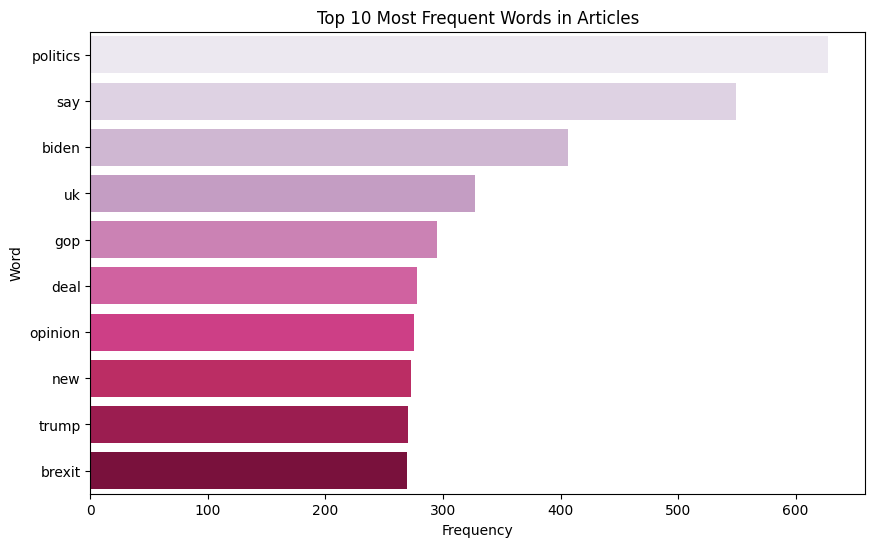

In [25]:
# Bar chart
plt.figure(figsize=(10,6))
sns.barplot(x = top_10.values, y = top_10.index, palette = 'PuRd')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Top 10 Most Frequent Words in Articles')
plt.show()

In [37]:
News_df['Title_lemmatized'] = News_df['Title'].apply(original)
df['Source'] = News_df['Source']

News_df 

,Title,Source,Title_lemmatized
0,A look back at Nicola Sturgeon's life in politics,BBC News,look back nicola sturgeon life politics
1,Philippines People Power: Who survives Bongbon...,BBC News,philippine people power survive bongbong marco...
2,Delhi's Manish Sisodia arrested over corruptio...,BBC News,delhis manish sisodia arrest corruption allega...
3,Ukraine war: Russia must be defeated but not '...,BBC News,ukraine war russia must defeat crushed macron say
4,Final stamps bearing the Queen's head revealed,BBC News,final stamp bear queen head reveal
...,...,...,...
6907,"Bassey bosses it, raucous gags and muted polit...",The Guardian,bassey boss raucous gag mute politics 9 thing ...
6908,"Bold action needed now on energy bills, says A...",The Guardian,bold action need energy bill say alistair darling
6909,New Cumbria coalmine ‘like opening a Betamax f...,The Guardian,new cumbria coalmine like open betamax factory...
6910,Scottish health workers threaten strikes after...,The Guardian,scottish health worker threaten strike reject ...


In [44]:
News_df.to_csv('Summative_02369451.csv', index = False)

News_df_from_file = pd.read_csv('Summative_02369451.csv')
print(News_df_from_file)


                                                  Title        Source  \
0     A look back at Nicola Sturgeon's life in politics      BBC News   
1     Philippines People Power: Who survives Bongbon...      BBC News   
2     Delhi's Manish Sisodia arrested over corruptio...      BBC News   
3     Ukraine war: Russia must be defeated but not '...      BBC News   
4        Final stamps bearing the Queen's head revealed      BBC News   
...                                                 ...           ...   
6907  Bassey bosses it, raucous gags and muted polit...  The Guardian   
6908  Bold action needed now on energy bills, says A...  The Guardian   
6909  New Cumbria coalmine ‘like opening a Betamax f...  The Guardian   
6910  Scottish health workers threaten strikes after...  The Guardian   
6911  No U-turn from Jeremy Hunt on scrapping banker...  The Guardian   

                                       Title_lemmatized  
0               look back nicola sturgeon life politics  
1     p